<a href="https://colab.research.google.com/github/nitvishnoi/SentimentBasedProductRecommendationSystem/blob/Ver1/Capstone_Sentiment_Based_Product_Recommendation_System_NitinV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

#####Data sourcing and sentiment analysis

#####Building a recommendation system

##### Improving the recommendations using the sentiment analysis model
##### Deploying the end-to-end project with a user interface
 

Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

# Install necessary packages

In [1]:
#Install required libraries 
#!pip install nltk 
#!pip install matplotlib
#!pip install mlxtend
#!pip install seaborn
#!pip install wordcloud
#!pip install imblearn
#!pip install xgboost
#!pip install sklearn
#!pip install spacy

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from PIL import Image
import sklearn 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics.pairwise import pairwise_distances
import pickle

import warnings
warnings.filterwarnings("ignore")
     

In [3]:
#download nltk libraries required 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip install pandas==1.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importing Input Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Upgrad/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 complaints.json
 env.yml
 Gesture_Recognition_Case-Study_final.ipynb
 macron.jpg
 MLOpsAssignment
 Project-2
 Project_data
 Project_data_gesture
 sample30.csv
'Skin cancer ISIC The International Skin Imaging Collaboration'
 Upgrad
 Yolo_Custom_Model


In [6]:
# Reading the csv file and putting it into 'df' object.
#data_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQYEcAEM_yOk5W6dk3Z-SFmQfeM-Dcoan3l8vCVpOJdjV6Q50zJM4EI5_2ZNYQub5nY7-jouXa_M6-n/pub?output=csv"
data_url = "/content/drive/MyDrive/Upgrad/sample30.csv"
df = pd.read_csv(data_url, parse_dates=True)

### 3. Understanding the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
df.shape

(30000, 15)

In [9]:
# converting reviews to str dtype 
df['reviews_username'] = df['reviews_username'].astype(str)

In [10]:
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [11]:
# Rating  - Basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews_rating,30000.0,4.483133,0.988441,1.0,4.0,5.0,5.0,5.0


In [12]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [13]:
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


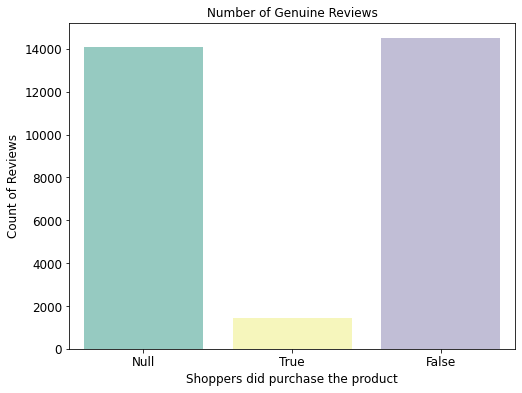

In [14]:
#on the reviews_didpurchase column, replace null values with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

#checking distribution of reviews_didpurchased

plt.figure(figsize=(8,6))
#sns.set_theme(style="darkgrid")
pl = sns.countplot(df['reviews_didPurchase'],palette="Set3")
pl.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=12)
pl.set_ylabel(ylabel='Count of Reviews', fontsize=12)
pl.axes.set_title('Number of Genuine Reviews', fontsize=12)
pl.tick_params(labelsize=12)
plt.show()

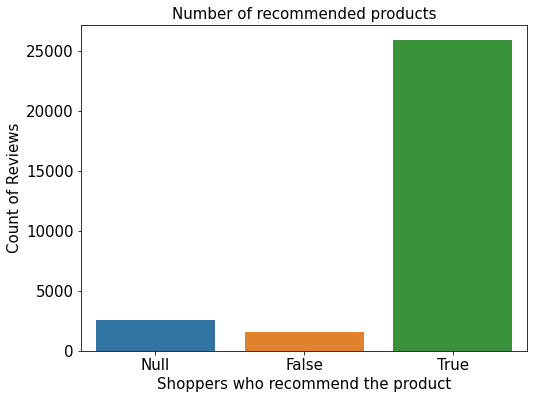

In [15]:
#on the reviews_doRecommend column, replace null values with "Null"
df['reviews_doRecommend'].fillna('Null', inplace=True)
#checking distribution of reviews_didpurchased

plt.figure(figsize=(8,6))
pl = sns.countplot(df['reviews_doRecommend'])
pl.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=15)
pl.set_ylabel(ylabel='Count of Reviews', fontsize=15)
pl.axes.set_title('Number of recommended products', fontsize=15)
pl.tick_params(labelsize=15)
plt.show()

In [16]:
df['reviews_doRecommend'].value_counts()

True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

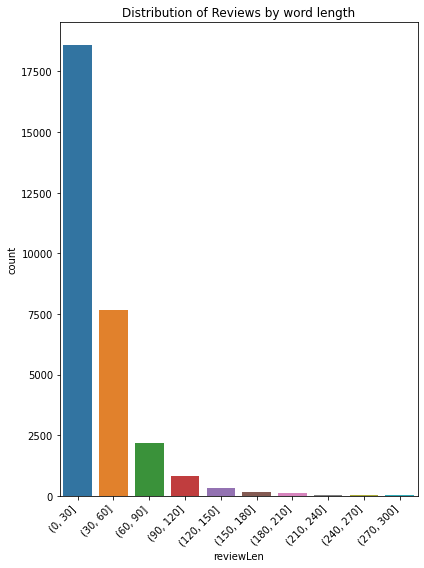

In [17]:
#Visualization of word reviews by length
f = plt.figure(figsize=(6,8))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLen'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_len = df_reviews.groupby(pd.cut(df_reviews.reviewLen, np.arange(0,330,30))).count()
reviews_len = reviews_len.rename(columns={'reviewLen':'count'})
reviews_len = reviews_len.reset_index()

reviewLenChart = sns.barplot(x='reviewLen',y='count',data=reviews_len)
reviewLenChart.set_title('Distribution of Reviews by word length')
reviewLenChart.set_xticklabels(reviewLenChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

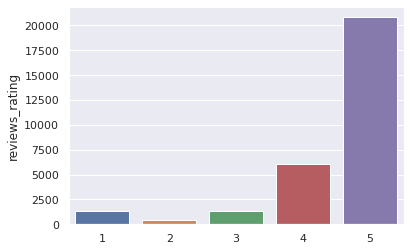

In [18]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.barplot(x=df.reviews_rating.value_counts().index, y=df.reviews_rating.value_counts())

### 4. Data Cleaning

#### 4.1 Missing % of each column

In [19]:
# Check for missing values percentage in different columns
def checkMissingPercentage(df):
    nullVal = []
    for i in df.isnull().sum()*100/df.shape[0]:
        nullVal.append(i)
    data = {'columns': list(df), 'null_%': nullVal}
    df_null = pd.DataFrame(data)
    df_null= df_null[df_null['null_%'] != 0]
    df_null=df_null.sort_values(by='null_%', ascending=False, inplace=False)
    display(df_null)
    return df_null

In [20]:
dfNotNull = checkMissingPercentage(df)

,columns,null_%
12,reviews_userProvince,99.433333
11,reviews_userCity,93.570000
10,reviews_title,0.633333
3,manufacturer,0.470000
5,reviews_date,0.153333
14,user_sentiment,0.003333


### 4.2 Dropping columns with missing values more than 25 %

In [21]:
list(dfNotNull[dfNotNull["null_%"] > 25]["columns"])

['reviews_userProvince', 'reviews_userCity']

 ### 4.3 Dropping the fields which have very high percentage of missing data

In [22]:
dfNotNull = df.drop(list(dfNotNull[dfNotNull["null_%"] > 25]["columns"]), axis = 1)

In [23]:
# checking null values again
round(100*dfNotNull.isnull().sum()/len(dfNotNull),3)

id                     0.000
brand                  0.000
categories             0.000
manufacturer           0.470
name                   0.000
reviews_date           0.153
reviews_didPurchase    0.000
reviews_doRecommend    0.000
reviews_rating         0.000
reviews_text           0.000
reviews_title          0.633
reviews_username       0.000
user_sentiment         0.003
dtype: float64

### 4.4 Dropping Null value rows from user_sentiment

In [24]:
dfNotNull = dfNotNull[dfNotNull['user_sentiment'].notna()]

### 4.5 Now selecting columns which are Relevant for the Analysis

In [25]:
df_relevant= dfNotNull[['id','brand', 'categories', 'manufacturer', 'name',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment']]

### 4.6 Now Mapping categorical to 1/0

In [26]:
df_relevant['reviews_doRecommend'] = df_relevant['reviews_doRecommend'].map(dict([(False,0),(True,1)]))

In [27]:
df_relevant['user_sentiment'] = df_relevant['user_sentiment'].map(dict([('Negative',0),('Positive',1)]))

# 5 EDA

### 5.1 Check for ratings accross the data

In [28]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29999 non-null  object 
 1   brand                29999 non-null  object 
 2   categories           29999 non-null  object 
 3   manufacturer         29858 non-null  object 
 4   name                 29999 non-null  object 
 5   reviews_doRecommend  27429 non-null  float64
 6   reviews_rating       29999 non-null  int64  
 7   reviews_text         29999 non-null  object 
 8   reviews_title        29809 non-null  object 
 9   reviews_username     29999 non-null  object 
 10  user_sentiment       29999 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.7+ MB


In [29]:
df_relevant['reviews_rating'].value_counts() 

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

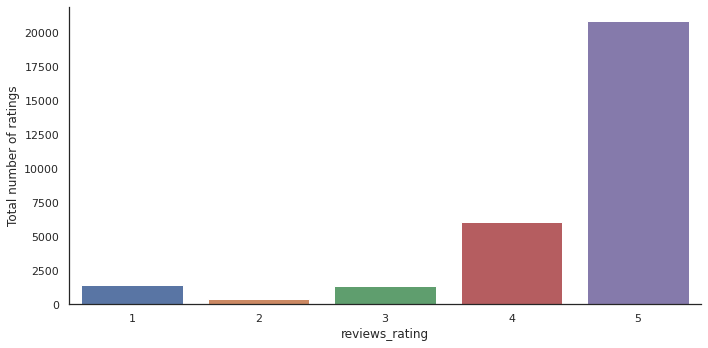

In [30]:
with sns.axes_style('white'):
    g = sns.catplot( x='reviews_rating', data=df_relevant, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

### 5.2 Checking for Unique Users and products

In [31]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df_relevant.shape[0])
print("Total No of Users   :", len(np.unique(df_relevant.reviews_username)))
print("Total No of products  :", len(np.unique(df_relevant.name)))

Total data 
--------------------------------------------------

Total no of ratings : 29999
Total No of Users   : 24915
Total No of products  : 271


### 5.3 Now checking for Ratings

In [32]:
no_of_rated_products_per_user = df_relevant.groupby(by='reviews_username')['reviews_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()
     

reviews_username
nan                  63
mike                 41
byamazon customer    41
chris                32
lisa                 16
Name: reviews_rating, dtype: int64

In [33]:
no_of_rated_products_per_user.describe()

count    24915.000000
mean         1.204054
std          0.864706
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         63.000000
Name: reviews_rating, dtype: float64

In [34]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

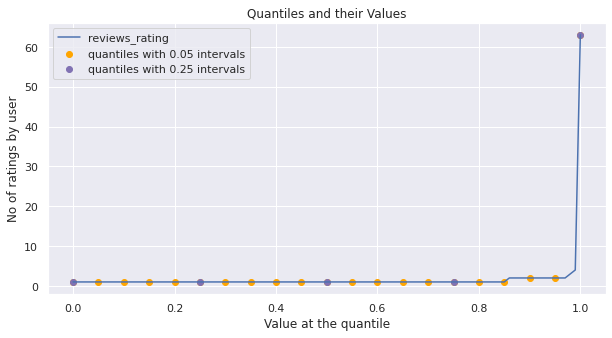

In [35]:
plt.figure(figsize=(10,5))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [36]:
print('\n No of rated product more than 15 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 15)) )


 No of rated product more than 15 per user : 8



# 6. Data Preprocessing

### 6.1 Doing Preprocessing the Reviews_text - Lowering the case

In [37]:
df_relevant['reviews_text']=df_relevant['reviews_text'].str.lower() 
# to make all letters lower  - For computers, 'Book' is not same word with 'book'. So, I will convert every letter in the tex

### 6.2 Doing Preprocessing the Reviews_text - Removing the punctuation

In [38]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_without_punc = "".join([c for c in text if c not in string.punctuation])
    return text_without_punc

### 6.3 Now removing punctuation & adding review header & review text after cleaning to a new column

In [40]:
df_relevant['reviews_text_clean'] = df_relevant['reviews_text'].apply(lambda x: remove_punctuation(str(x))) + ' ' + df['reviews_text'].apply(lambda x: remove_punctuation(x))

### 6.4 Getting Cleaned data information

In [41]:
df_relevant['reviews_text_clean']

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                  good flavor Good flavor
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: reviews_text_clean, Length: 29999, dtype: object

In [42]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29999 non-null  object 
 1   brand                29999 non-null  object 
 2   categories           29999 non-null  object 
 3   manufacturer         29858 non-null  object 
 4   name                 29999 non-null  object 
 5   reviews_doRecommend  27429 non-null  float64
 6   reviews_rating       29999 non-null  int64  
 7   reviews_text         29999 non-null  object 
 8   reviews_title        29809 non-null  object 
 9   reviews_username     29999 non-null  object 
 10  user_sentiment       29999 non-null  int64  
 11  reviews_text_clean   29999 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.0+ MB


In [43]:
df_relevant.head(5)

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_text_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,i love this album its very good more to the hi...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor. this review was collected as part...,Good,dorothy w,1,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor.,Good,dorothy w,1,good flavor Good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,i read through the reviews on here before look...,Disappointed,rebecca,0,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,my husband bought this gel for us. the gel cau...,Irritation,walker557,0,my husband bought this gel for us the gel caus...


### 6.5 Removing STOP words 

In [44]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'your', 'when', 'is', "should've", 'which', 'didn', "aren't", 'shouldn', 'but', 'aren', 'further', 'myself', 'yourselves', 'about', 'did', 'what', 'me', 'having', 'won', 'themselves', 'than', 'very', "mightn't", 'my', 'wasn', 'i', 'himself', 'on', 'for', 'up', 'will', "mustn't", 'shan', 'been', 'her', 'or', 'through', 'wouldn', 'how', 'with', 'off', 'yours', 'should', 'both', 'whom', 'some', 'was', 'here', 'couldn', "couldn't", 'haven', 'does', 'that', "she's", 'ma', 'isn', 'are', "needn't", 'few', 'doing', 'of', 'him', 'them', 'just', "it's", "shouldn't", 'd', 'not', 'below', 'where', 'too', 'their', 'during', 't', 'they', "isn't", 'again', 'mightn', 'hadn', 'nor', "weren't", 'we', 'why', 'yourself', 'll', 'its', 'before', "doesn't", 'hers', 'same', 'all', 'y', "you'd", "hadn't", "wouldn't", 'other', 'who', 'above', 'by', 'out', 'over', "didn't", 'once', 'only', 'weren', 'ourselves', 'so', 're', 'then', 'mustn', 'itself', 'as', 'against', 'more', 'no', 'until', 'o', 'herself', 'at', 

In [45]:
# Function to remove the stopwords
def remove_stopwords(sent):
    sent = sent.lower() # Text to lowercase
    #print(sent)
    words = word_tokenize(sent) # Split sentences into words
    #print(words)
    text_nostopwords = " ".join( [each_word for each_word in words if each_word not in stopwords_set] )
    #print(text_nostopwords)
    return text_nostopwords

In [46]:
df_relevant['reviews_without_stopwords'] = df_relevant['reviews_text_clean'].apply(remove_stopwords)

In [47]:
df_relevant['reviews_without_stopwords']

0        love album good hip hop side current pop sound...
1        good flavor review collected part promotion go...
2                                  good flavor good flavor
3        read reviews looking buying one couples lubric...
4        husband bought gel us gel caused irritation fe...
                               ...                        
29995    got conditioner influenster try im loving far ...
29996    love received review purposes influenster leav...
29997    first love smell product wash hair smooth easy...
29998    received influenster never go back anything el...
29999    received product complimentary influenster rea...
Name: reviews_without_stopwords, Length: 29999, dtype: object

In [48]:
df_relevant.head(5)

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_text_clean,reviews_without_stopwords
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,i love this album its very good more to the hi...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor. this review was collected as part...,Good,dorothy w,1,good flavor this review was collected as part ...,good flavor review collected part promotion go...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor.,Good,dorothy w,1,good flavor Good flavor,good flavor good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,i read through the reviews on here before look...,Disappointed,rebecca,0,i read through the reviews on here before look...,read reviews looking buying one couples lubric...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,my husband bought this gel for us. the gel cau...,Irritation,walker557,0,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...


### 6.6. Now using lemmatization on text

In [49]:
import re, nltk, spacy, string
import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

In [50]:
#Function to lemmatize the text
def lemmatized_text(text):
    sentences = []
    doc = nlp(text)
    for token in doc:
        sentences.append(token.lemma_)
    return " ".join(sentences)

In [51]:
df_relevant['lemmatized_reviews'] = df_relevant['reviews_without_stopwords'].apply(lemmatized_text)

### 6.7 Creating Positive sentiment Wordcloud

In [52]:
stop_words = set(STOPWORDS) # setting stop words

In [53]:
df_pos = df_relevant.loc[df_relevant['user_sentiment']==1] # positive reviews dataframe

In [54]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=500)
     

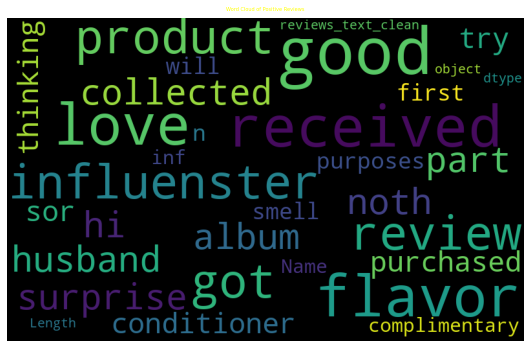

In [55]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['reviews_text_clean']))
plt.figure(figsize=(10.0,5.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Positive Reviews", fontdict={'size': 5, 'color': 'Yellow', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

### 6.8 Creating Negative sentiment Wordcloud

In [56]:
df_neg = df_relevant.loc[df_relevant['user_sentiment']==0] # Negative reviews dataframe

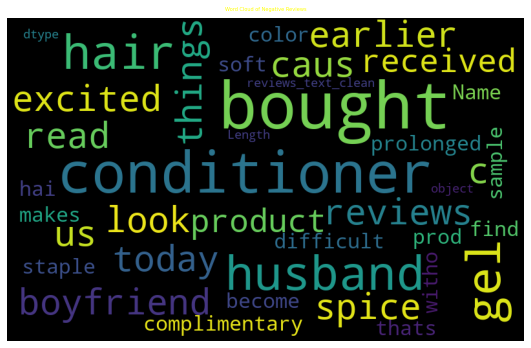

In [57]:
# to see the Negative reviews wordcloud
wordcloud.generate(str(df_neg['reviews_text_clean']))
plt.figure(figsize=(10.0,5.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Negative Reviews", fontdict={'size': 5, 'color': 'Yellow', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

#### 6.9 Now using Custom functions to Look Most Common Positive and Negative Words

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

#### 6.9.1 Getting Top 25 Common Words List in Positive Reviews

In [61]:
## Top 25 Common Words List in Positive Reviews
word_frequency=word_count(df_pos['reviews_text_clean']) #tokenize and count and create dictionary

In [62]:
# to create dataframe from most common words dictionary

df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [63]:
stop = set(stopwords.words("english")) #setting stopwords

In [64]:
# taking only words which are not stopwords
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [65]:
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [66]:
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

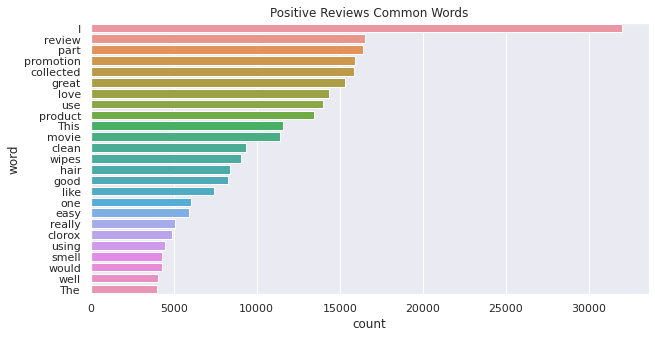

In [67]:
plt.figure(figsize=(10,5))
plt.title('Positive Reviews Common Words')
sns.barplot(y="word",x="count", data=df_top_25_pos)

### 6.9.2 Now getting Top 25 Common Words List in Negative Reviews

In [68]:
word_frequency_neg=word_count(df_neg['reviews_text_clean'])

In [69]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)

# 8. Doing Train, Test and Split of cleaned data for modeling

In [70]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [71]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

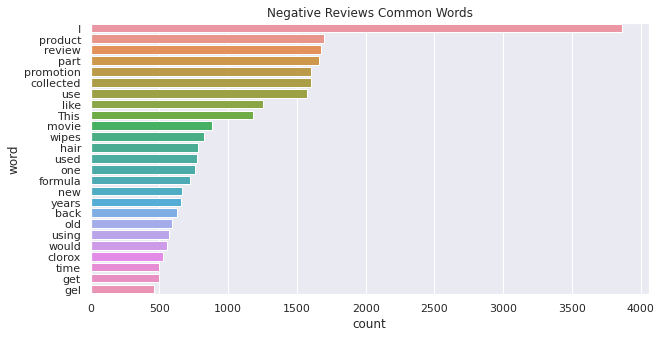

In [72]:
plt.figure(figsize=(10,5))
plt.title('Negative Reviews Common Words')
sns.barplot(y= "word",x="count", data=df_top_25_neg)

In [73]:
 # split train-test
X_train, X_test, y_train, y_test = train_test_split(df_relevant['lemmatized_reviews'], df_relevant['user_sentiment'], test_size=0.2, random_state=31)
print(X_train.shape)
print(X_test.shape)

(23999,)
(6000,)


In [74]:
 # define vectorize and fit to data     
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

word_vectorizer.fit(df_relevant['reviews_text_clean'])
    
# train - test vectorized features
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [75]:
# oversampling - to handle data imbalance
sm = SMOTE(random_state = 2,sampling_strategy='auto')
train_word_features, y_train = sm.fit_resample(train_word_features, y_train)

In [76]:
print(train_word_features.shape)
print(y_train.shape)

(42634, 10000)
(42634,)


# 9. Function for Creating a method for confusion matrix and scores

In [77]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)
    print('\n')
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

In [78]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# 10. Modeling

# 10.1 Logistic Regression modelling

In [79]:
 classifier = LogisticRegression(class_weight = "balanced") #, C=0.5, solver='sag')

In [80]:
# Hyperparameter Tuning
C = [(x) for x in np.logspace(start = 0 , stop = 4, num = 11)] # returns 11 numbers 
penalty = ["l1","l2"]
solver = ["liblinear", "saga"]
r_grid = {'C': C, 'penalty': penalty, 'solver': solver}

In [81]:
grid = {"C":np.logspace(-3,3,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv = RandomizedSearchCV(estimator=classifier, param_distributions= r_grid, cv=3, n_iter = 20, scoring='f1', verbose=2, random_state=31, n_jobs=-1, return_train_score=True)
logreg_cv.fit(train_word_features,y_train.values.ravel())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1.0, 2.51188643150958,
                                              6.309573444801933,
                                              15.848931924611142,
                                              39.810717055349734, 100.0,
                                              251.18864315095823,
                                              630.9573444801937,
                                              1584.893192461114,
                                              3981.0717055349733, 10000.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=31, return_train_score=True, scoring='f1',
                   verbose=2)

In [82]:
print_results(logreg_cv)

BEST PARAMS: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100.0}

0.935 (+/-0.011) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 1584.893192461114}
0.938 (+/-0.012) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 251.18864315095823}
0.928 (+/-0.015) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
0.925 (+/-0.016) for {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.94 (+/-0.016) for {'solver': 'saga', 'penalty': 'l1', 'C': 2.51188643150958}
0.946 (+/-0.013) for {'solver': 'saga', 'penalty': 'l2', 'C': 1584.893192461114}
0.947 (+/-0.012) for {'solver': 'saga', 'penalty': 'l2', 'C': 39.810717055349734}
0.944 (+/-0.012) for {'solver': 'liblinear', 'penalty': 'l2', 'C': 630.9573444801937}
0.946 (+/-0.015) for {'solver': 'saga', 'penalty': 'l1', 'C': 6.309573444801933}
0.946 (+/-0.013) for {'solver': 'saga', 'penalty': 'l1', 'C': 10000.0}
0.946 (+/-0.014) for {'solver': 'saga', 'penalty': 'l1', 'C': 15.848931924611142}
0.946 (+/-0.015) for {'solver': 'liblinear', 'penalty'

In [83]:
 # calculating results 
lr_model = LogisticRegression(class_weight = "balanced", **logreg_cv.best_params_)
lr_model.fit(train_word_features,y_train)

LogisticRegression(C=100.0, class_weight='balanced', solver='liblinear')

In [84]:
y_pred_train = lr_model.predict(train_word_features)
y_pred = lr_model.predict(test_word_features)

In [85]:
print(lr_model.score(test_word_features , y_test))

0.9066666666666666


In [86]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")


Accuracy:
TRAIN: 0.9835811793404325
TEST: 0.9066666666666666


In [87]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.9834851130090124
TEST: 0.9464114832535885


In [88]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 495  190]
 [ 370 4945]]


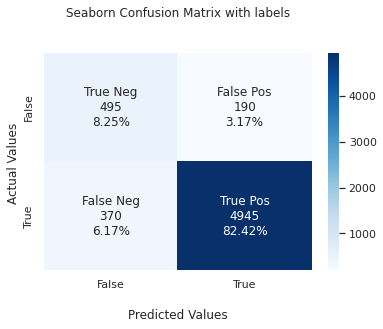

In [89]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
# saving the model
#pickle.dump(lr_model, open('sentiment-classification-logistic-regression-model.pkl', 'wb'))
#pickle.dump(word_vectorizer, open("tfidf-vectorizer.pkl", "wb"))

In [91]:
#tfs=pd.read_pickle('tfidf-vectorizer.pkl')
#mdl=pd.read_pickle('sentiment-classification-logistic-regression-model.pkl')

In [92]:
#mdl

In [93]:
#tfs

# 8.2 Random Forest Model

In [94]:
 # choosing and fitting classifier
classifier = RandomForestClassifier(class_weight = "balanced")

In [95]:
 # Hyperparameter Tuning
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators,

            'max_features': max_features,

            'max_depth': max_depth,

            'bootstrap': bootstrap}

In [96]:
cv= RandomizedSearchCV(estimator=classifier, param_distributions=r_grid, n_iter = 20, scoring='f1', 
                      cv = 3, verbose=2, random_state=31, n_jobs=-1, return_train_score=True)
cv.fit(train_word_features,y_train.values.ravel())
print_results(cv)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
BEST PARAMS: {'n_estimators': 11, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

0.955 (+/-0.018) for {'n_estimators': 15, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
0.695 (+/-0.075) for {'n_estimators': 9, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
0.32 (+/-0.148) for {'n_estimators': 8, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}
0.929 (+/-0.015) for {'n_estimators': 6, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
0.278 (+/-0.149) for {'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False}
0.943 (+/-0.014) for {'n_estimators': 10, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
0.508 (+/-0.07) for {'n_estimators': 15, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False}
0.96 (+/-0.022) for {'n_estimators': 9, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
0.412 (+/-0.185) for {'n

In [97]:
# calculating results 
y_pred_train = cv.predict(train_word_features)
y_pred = cv.predict(test_word_features)

best_random = RandomForestClassifier(class_weight = "balanced", **cv.best_params_)
best_random.fit(train_word_features,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=11)

In [98]:
print(best_random.score(test_word_features , y_test))

0.9115


In [99]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.999530890838298
TEST: 0.9078333333333334


In [100]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.9995306926975784
TEST: 0.9486011711125569


In [101]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 344  341]
 [ 212 5103]]


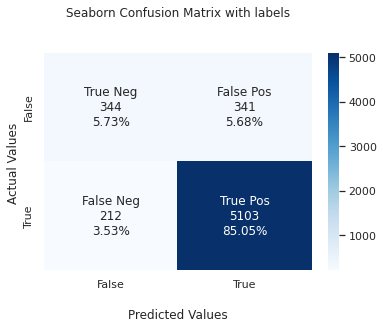

In [102]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 8.3  Naive Bayes Model

In [103]:
 # choosing and fitting classifier
classifier = GaussianNB()

In [104]:
 # Hyperparameter Tuning
param_dist = {
'var_smoothing': np.logspace(0,-5, num=100)
}


cv = RandomizedSearchCV(estimator = classifier, 
                        param_distributions = param_dist,
                        cv = 3,  
                        n_iter = 10, n_jobs = 1,
                        scoring = 'f1', error_score = 0,
                        verbose = 0, 
                        random_state=31, return_train_score=False)

cv.fit(train_word_features.toarray(),y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'var_smoothing': 0.00041320124001153384}

0.01 (+/-0.004) for {'var_smoothing': 0.1384886371393873}
0.12 (+/-0.039) for {'var_smoothing': 0.021544346900318832}
0.679 (+/-0.013) for {'var_smoothing': 0.000145082877849594}
0.0 (+/-0.0) for {'var_smoothing': 0.7054802310718643}
0.671 (+/-0.006) for {'var_smoothing': 0.001484968262254465}
0.0 (+/-0.0) for {'var_smoothing': 1.0}
0.199 (+/-0.05) for {'var_smoothing': 0.013530477745798068}
0.0 (+/-0.0) for {'var_smoothing': 0.39442060594376555}
0.699 (+/-0.009) for {'var_smoothing': 0.0009326033468832199}
0.701 (+/-0.013) for {'var_smoothing': 0.00041320124001153384}


In [105]:
# calculating results 
y_pred_train = cv.predict(train_word_features.toarray())
y_pred = cv.predict(test_word_features.toarray())

best_nb = GaussianNB(**cv.best_params_)
best_nb.fit(train_word_features.toarray(),y_train.values.ravel())


GaussianNB(var_smoothing=0.00041320124001153384)

In [106]:
print(best_nb.score(test_word_features.toarray() , y_test))

0.5666666666666667


In [107]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.7866491532579631
TEST: 0.5666666666666667


In [108]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.7339572974553964
TEST: 0.692889203874321


In [109]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 467  218]
 [2382 2933]]


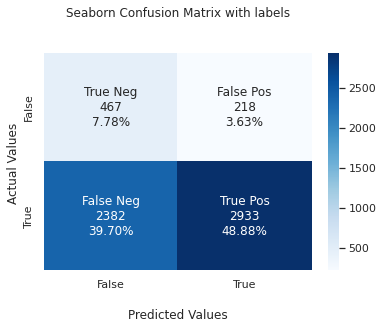

In [110]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 8.4 XGBoost model

In [111]:
from sklearn.model_selection import GridSearchCV
 # choosing and fitting classifier
classifier = xgb.XGBClassifier()

In [112]:
#### Fitting a XGBoost classifier with various custom hyperparameters.

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

# set up GridSearchCV()
cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

cv.fit(train_word_features.toarray(),y_train.values.ravel())
print_results(cv)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}

0.824 (+/-0.002) for {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 1}
0.824 (+/-0.002) for {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 3}
0.875 (+/-0.008) for {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 1}
0.875 (+/-0.009) for {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 3}
0.824 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1}
0.828 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 3}
0.875 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1}
0.882 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


In [113]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.7866491532579631
TEST: 0.5666666666666667


In [114]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.7339572974553964
TEST: 0.692889203874321


### 8.4.2 Displaying Confusion matrix Scores

In [115]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 467  218]
 [2382 2933]]


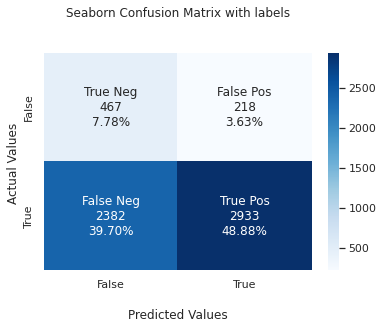

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 9. Model Comparision and summary of the models created

In [117]:
results = {('LR'):[0.98, 0.91, 0.98, 0.95], ('RF'):[0.99, 0.90, 0.99, 0.94], ('NB'):[0.79, 0.57, 0.73, 0.69], ('XGBoost'):[0.79, 0.57, 0.73,0.69],}
pd.DataFrame(results, index=['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])

,LR,RF,NB,XGBoost
Train Accuracy,0.98,0.99,0.79,0.79
Test Accuracy,0.91,0.90,0.57,0.57
Train F1 Score,0.98,0.99,0.73,0.73
Test F1 Score,0.95,0.94,0.69,0.69


### Considering F1-Score as the scoring measure as it will penalise model for both FP & FN, in above 4 models, performance of Randon Forest is highest.

**Accuracy:**

TRAIN: 0.9995

TEST: 0.9037

**F1-Score:**

TRAIN: 0.9995

TEST: 0.9463 


# As we finalized as per above analysis our best model is random forsest so saving it in pikel format to use for deployment of the model

In [118]:
# saving the model
pickle.dump(best_random, open('RandomForest-classification-regression-model.pkl', 'wb'))
pickle.dump(word_vectorizer, open("tfidf-vectorizer.pkl", "wb"))
pickle.dump(df_relevant, open('cleaned-data.pkl', 'wb'))

In [119]:
from google.colab import files
files.download('RandomForest-classification-regression-model.pkl')
files.download('tfidf-vectorizer.pkl')
files.download('cleaned-data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
tfs=pd.read_pickle('tfidf-vectorizer.pkl')

In [121]:
mdl=pd.read_pickle('RandomForest-classification-regression-model.pkl')

In [122]:
mdl

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=11)

In [123]:
tfs

TfidfVectorizer(max_features=10000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

# **10. User Based Recommendation System**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   30000 non-null  object
 7   reviews_doRecommend   30000 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      30000 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [125]:
df_final = df[["id", "name", "reviews_rating", "reviews_username"]]

In [126]:
df_final.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [127]:
df_final.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


## 10.1. Train test and split data

In [128]:
# split train-test
train, test = train_test_split(df_final, test_size=0.2, random_state=31)
print(train.shape)
print(test.shape)

(24000, 4)
(6000, 4)


In [129]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

#### Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.

In [130]:
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.2 Pivot the 'train ratings' dataset into matrix format in which columns are product names and the rows are user names.

In [131]:
# Convert the dummy train dataset into matrix format.
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.3 Creating dummy train & dummy test dataset
These dataset will be used for prediction

- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [132]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [133]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

### 10.4 Pivot the 'train ratings' dataset into matrix format in which columns are product names and the rows are user names.

In [134]:
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1085,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10ten,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 10.5 User similarity matrix

In [135]:
df_pivot.index.nunique()

20548

### **10.6 Cosine Similarity**
- Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

**Adjusted Cosine**

- Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

In [136]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print('user_correlation==================================================================')
print(user_correlation)
print('user_correlation shape==================================================================')
print(user_correlation.shape)

user_correlation==================================================================
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
user_correlation shape==================================================================
(20548, 20548)


### 10.7. Prediction User-User

In [137]:
#Filtering out the user_correlation that are negatively correlated
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [138]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.70014004, ..., 3.63268449, 0.        ,
        0.        ],
       [0.        , 0.        , 5.21378307, ..., 1.98597026, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.53553391, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.4866195 , 0.        ,
        0.70014004],
       [0.        , 0.        , 0.        , ..., 3.53553391, 0.        ,
        0.        ]])

In [139]:
#we are interested in products that are not rated by the user, so we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,1.949532,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
00sab00,0.0,0.0,0.700140,11.730271,0.0,0.0,0.0,0.000000,1.305582,0.000000,...,1.823492,0.445435,0.000000,0.000000,1.189296,0.0,0.000000,3.632684,0.0,0.00000
01impala,0.0,0.0,5.213783,29.315508,0.0,0.0,0.0,0.000000,0.000000,2.119252,...,5.712669,0.267261,0.000000,1.555428,1.375123,0.0,0.000000,1.985970,0.0,0.00000
0325home,0.0,0.0,0.000000,17.620936,0.0,0.0,0.0,3.123475,6.937603,2.383656,...,0.000000,0.445435,3.535534,0.000000,0.000000,0.0,4.697898,3.535534,0.0,0.00000
06stidriver,0.0,0.0,0.000000,17.620936,0.0,0.0,0.0,3.123475,6.937603,2.383656,...,0.000000,0.445435,3.535534,0.000000,0.000000,0.0,4.697898,3.535534,0.0,0.00000
08dallas,0.0,0.0,0.000000,0.495074,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
09mommy11,0.0,0.0,0.000000,2.608350,0.0,0.0,0.0,3.535534,0.000000,6.010227,...,0.000000,0.000000,2.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
1085,0.0,0.0,0.000000,14.047724,0.0,0.0,0.0,0.521286,0.000000,0.000000,...,1.995217,0.000000,2.500000,0.000000,1.486620,0.0,2.236068,1.486620,0.0,0.70014
10ten,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000


### 10.8. Here we are finding 20 recommendation for the user

In [140]:
user_input = "jacmary" 
print('user_input-',user_input)

user_input- jacmary


In [141]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpf3VOfilAPnD_xjpun    12.694543
AVpfPaoqLJeJML435Xk9     8.041552
AVpf4oLxLJeJML43FcxC     6.108013
AVpf0eb2LJeJML43EVSt     5.623475
AVpfRoqcLJeJML436FqG     3.535534
AVpe9W4D1cnluZ0-avf0     3.535534
AVpfazX31cnluZ0-kbdl     3.535534
AV1YmDL9vKc47QAVgr7_     3.535534
AVpf0thK1cnluZ0-r8vR     3.535534
AVpe8gsILJeJML43y6Ed     3.535534
AVpfrTyiLJeJML43BrSI     3.535534
AVpfoSS51cnluZ0-oVH9     3.123475
AVpfPnrU1cnluZ0-g9rL     2.785242
AV1Yn94nvKc47QAVgtst     2.649065
AVpfJP1C1cnluZ0-e3Xy     2.500000
AVpfluP1ilAPnD_xejxO     2.321192
AVpfBrUZilAPnD_xTUly     2.321192
AVpe4hlXLJeJML43xbrB     2.321192
AVpfVPh3ilAPnD_xZzW9     2.151657
AVpfM_ytilAPnD_xXIJb     2.151657
Name: jacmary, dtype: float64

### 10.9 Displaying the Top 20 products with id, name and similarity_score

In [142]:
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,12.694543
6771,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,8.041552
9447,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,6.108013
9704,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5.623475
10391,AVpfRoqcLJeJML436FqG,"Vicks Vaporub, Regular, 3.53oz",3.535534
10464,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,3.535534
10748,AVpfazX31cnluZ0-kbdl,Just For Men Touch Of Gray Gray Hair Treatment...,3.535534
10928,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",3.535534
11001,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),3.535534
11113,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",3.535534


### 10.10. Evaluation User-User

In [143]:
# To evaluate, we will predict for the products already rated by the user insead of predicting it for the products not rated by the user.

In [144]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1509, 4)

In [145]:
common.head(10)

,id,name,reviews_rating,reviews_username
20634,AVpfkak01cnluZ0-nJj6,Starbucks Iced Expresso Classics Vanilla Latte...,5,girlie
26479,AVpfPPkEilAPnD_xX3cP,Aveeno Baby Continuous Protection Lotion Sunsc...,1,kasheville
15098,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,5,arlene
17968,AVpfcu821cnluZ0-k8ep,Vaseline Intensive Care Lip Therapy Cocoa Butter,5,mimi3
28020,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,movielover
4921,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,mustang
24779,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,mountainman
6166,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),5,worm
22269,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),4,radicxs2
15032,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,4,cat


In [146]:
# convert into the user-product matrix.
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
common_user_based_matrix.head()     

id,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,...,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfshNsLJeJML43CB8q,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7inthenest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20538,20539,20540,20541,20542,20543,20544,20545,20546,20547
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [148]:
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20538,20539,20540,20541,20542,20543,20544,20545,20546,20547
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
06stidriver,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [149]:
list_name_user = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name_user)]

In [150]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name_user)]

In [151]:
user_correlation_df_3 = user_correlation_df_2.T

In [152]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 1.58776837,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.47536886, 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.53553391]])

In [153]:
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [154]:
common_user_based_matrix.head()

id,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,...,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfshNsLJeJML43CB8q,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7inthenest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [156]:
common_user_predicted_ratings.head()

id,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,...,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfshNsLJeJML43CB8q,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7inthenest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.11. Model Evaluation : Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [157]:
#Calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [158]:
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [159]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [160]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print("RMSE-")
print(rmse)

RMSE-
2.1555246880402223


# **11. Item Based Recommendation System**

### Taking the transpose of the rating matrix to normalize the rating around the mean for different product. In the user based similarity, we had taken mean for each user instead of each product.

In [161]:
df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column)

df_pivot.head(15)

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1Ymf_rglJLPUi8II2v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [163]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 11.1 Item Similarity Matrix

In [164]:
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [165]:
item_correlation[item_correlation<0]=0

### 11.2 Prediction - item-item

In [166]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01158512, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00120145, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00632436, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00096116, 0.        ,
        0.        ]])

### 11.3 Filtering the rating only for the movies not rated by the user for recommendation

In [167]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.016616,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000445,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
01impala,0.0,0.0,0.011585,0.000000,0.0,0.0,0.0,0.0,0.000000,0.004703,...,0.000000,0.07137,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
0325home,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003061,0.001635,...,0.000000,0.00000,0.004103,0.0,0.0,0.0,0.0,0.001201,0.0,0.0
06stidriver,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003061,0.001635,...,0.000000,0.00000,0.004103,0.0,0.0,0.0,0.0,0.001201,0.0,0.0


### 11.4 Finding the top 20 recommendation for the user

In [168]:
# Take the user ID as input
user_input = 'jacmary'
print(user_input)

jacmary


### 11.5 Recommending the Top 5 products to the user.

In [169]:
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpfIfnYilAPnD_xVpGi    0.004394
AVpfPnrU1cnluZ0-g9rL    0.003548
AVpe4hlXLJeJML43xbrB    0.003213
AVpfluP1ilAPnD_xejxO    0.002905
AVpfOmKwLJeJML435GM7    0.002833
AVpfVPh3ilAPnD_xZzW9    0.001887
AVpfrTyiLJeJML43BrSI    0.001677
AV1YmDL9vKc47QAVgr7_    0.001510
AVpe8gsILJeJML43y6Ed    0.001318
AVpfazX31cnluZ0-kbdl    0.001227
AVpfRoqcLJeJML436FqG    0.000983
AVpf0thK1cnluZ0-r8vR    0.000898
AVpfBrUZilAPnD_xTUly    0.000766
AVpfm8yiLJeJML43AYyu    0.000686
AVpe9W4D1cnluZ0-avf0    0.000663
AVpfM_ytilAPnD_xXIJb    0.000547
AVpfRTh1ilAPnD_xYic2    0.000358
AVpfJP1C1cnluZ0-e3Xy    0.000165
AVpf3VOfilAPnD_xjpun    0.000104
AVpfPaoqLJeJML435Xk9    0.000000
Name: jacmary, dtype: float64

In [170]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfIfnYilAPnD_xVpGi,Soothing Touch Lemon Cardamom Vegan Lip Balm ....,0.004394
5,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's C...,0.003548
164,AVpe4hlXLJeJML43xbrB,Hawaiian Punch Berry Limeade Blast Juice,0.003213
183,AVpfluP1ilAPnD_xejxO,Stacy's Simply Naked Bagel Chips,0.002905
203,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,0.002833
504,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub,0.001887
518,AVpfrTyiLJeJML43BrSI,Various Artists - Choo Choo Soul (cd),0.001677
542,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",0.001510
615,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",0.001318
869,AVpfazX31cnluZ0-kbdl,Just For Men Touch Of Gray Gray Hair Treatment...,0.001227


### 11.6 Evaluation - item-item

In [171]:
common =  test[test.id.isin(train.id)]
common.shape

(5984, 4)

In [172]:
common.head(10)

,id,name,reviews_rating,reviews_username
4332,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,sansname
3434,AVpe5s3RLJeJML43x4eA,Pantene Pro-V Expert Collection Age Defy Condi...,5,jennypstrong
20634,AVpfkak01cnluZ0-nJj6,Starbucks Iced Expresso Classics Vanilla Latte...,5,girlie
26479,AVpfPPkEilAPnD_xX3cP,Aveeno Baby Continuous Protection Lotion Sunsc...,1,kasheville
29726,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,payy
29709,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,shellabean
12060,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jules7771
3466,AVpe5ttZLJeJML43x4yO,Nature's Path Flax Plus Maple Pecan Crunch Cereal,5,xkatie
26266,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's C...,3,jks84117
3049,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,5,dndfantasyfootball


In [173]:
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [174]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001698,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [176]:
list_name = common.id.tolist()

item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]


item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [177]:
df_subtracted

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfsQoeilAPnD_xgfx5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.01930854, 0.01544683, ..., 0.        , 0.        ,
        0.        ],
       [0.02262934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00379462, 0.        , 0.        , ..., 0.00120145, 0.        ,
        0.00120145],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [179]:
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [180]:
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)

11.7. Model Evaluation : Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [181]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [182]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [183]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print("RMSE-")
print(rmse)

RMSE-
3.5936212826106506


# **12. Inference: Recommendation System**

Based on the evaluation of both

- User Based Recommendation system ( rmse = 2.15 )

- Item Based Recommendation System ( rmse = 3.59 )

In reference to RMSE score, I am going ahead with User Based Recommendation system as it has comparatively lower RMSE value.

In [192]:
pickle.dump(user_final_rating, open('user_final_rating.pkl', 'wb'))

# 13. Module Experiment

In [224]:
# Significant Users List
user_df = user_final_rating.T.sum().sort_values(ascending = False)
user_list = user_df[user_df > 0].index.tolist()
print(user_list)


['fred23', 'tyler', 'cynthia', 'juice', 'tinaj', 'moemoe', 'wind', 'danman', 'bman', 'kiki', 'gabi', 'floyd', 'minion', 'pooh', 'lemon', 'lengaleng', 'deeg', 'so77', 'deegzz', 'delisa67', 'deejay', 'deejea', 'delilah13', 'leighlabelle1', 'delias00', 'soccercoach', 'leila5', 'deen19', 'soccermama', 'leimomi', 'deestroyer', 'lena89', 'leighdvm', 'omeomi1972', 'dellaplayer', 'oneal', 'so1diergal', 'des23', 'leelee1225', 'leelee88445', 'desiree', 'ongwe', 'onewildorange', 'designapeel', 'onepassionforhim', 'leesahp', 'leese123', 'desa', 'onemoremakes4', 'deltakimble', 'leewf', 'snowdogmom', 'denvermom', 'onefrugallady', 'denise67', 'denise2126', 'denise1107', 'denise10142', 'deeeeeeeeeee', 'leighann11', 'deef', 'olivia62884', 'deeds', 'soccermom1', 'debralynn', 'oldman58', 'sojaded08', 'les32', 'les82', 'lesg007', 'debey', 'soloactual', 'debby13', 'someonesmom', 'debbied', 'debbie54', 'leslie42787', 'somnium', 'lesos20', 'debaaronj', 'deb55', 'deb444', 'song', 'deb1986', 'deb17', 'deb1023'

In [225]:
def Sentiment_Recommendations(user_name):
    if (user_name in user_final_rating.index):
        # get the product recommedation using the trained ML model
        top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
        df_top20_products = df_relevant[df_relevant.name.isin(top20_recommended_products)]
        X = tfs.transform(df_top20_products["lemmatized_reviews"].values.astype(str))
        # Use the best sentiment model to predict the sentiment for these user reviews
        df_top20_products['predicted_sentiment'] = mdl.predict(X)
        df_top20_products = df_top20_products[['name','predicted_sentiment']]
        df_top20_products_grouped = df_top20_products.groupby('name', as_index=False).count()
        df_top20_products_grouped["pos_review_count"] = df_top20_products_grouped.name.apply(lambda x: df_top20_products[(df_top20_products.name==x) & (df_top20_products.predicted_sentiment==1)]["predicted_sentiment"].count())
        df_top20_products_grouped["total_review_count"] = df_top20_products_grouped['predicted_sentiment']
        df_top20_products_grouped['pos_sentiment_percent'] = np.round(df_top20_products_grouped["pos_review_count"]/df_top20_products_grouped["total_review_count"]*100,2)
        return df_top20_products_grouped.sort_values('pos_sentiment_percent', ascending=False)

    else:
        print(f"User name {user_name} doesn't exist")

In [227]:
#testing the above fuction using one of the users that's trained on.
Sentiment_Recommendations("jacmary")

ValueError: ignored